### Etsitään mustavalkoisista kuvista, mikä numero kuvissa on (0-9) eli 10 luokkaa

## Concolutional Neural Network (CNN) / KOnvoluutioneuroverkot

Code Reference: 
https://keras.io/examples/vision/mnist_convnet/

Other references:

https://en.wikipedia.org/wiki/MNIST_database 

https://yann.lecun.com/exdb/mnist/ 

https://www.tensorflow.org/datasets/catalog/mnist

https://www.kaggle.com/code/cdeotte/25-million-images-0-99757-mnist 

CNN:

https://www.geeksforgeeks.org/introduction-convolution-neural-network/

## Setup

In [1]:
%matplotlib inline 
import os
import tensorflow as tf
import numpy as np
from datetime import datetime
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, losses, metrics, optimizers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print("tensorflow", tf.__version__)

tensorflow 2.18.0


In its original form, the image data is in a 2D form of rows and columns (28, 28), while the ConvNet layers expect 3D form, including the depth dimension. Therefore, we reshape the tensors to have the form (28, 28, 1) appropriate for black and white images.

In addition, all the entries of the tensors are normalized by dividing by 255 as before.

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
# convert multi class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

To see what the data looks like:

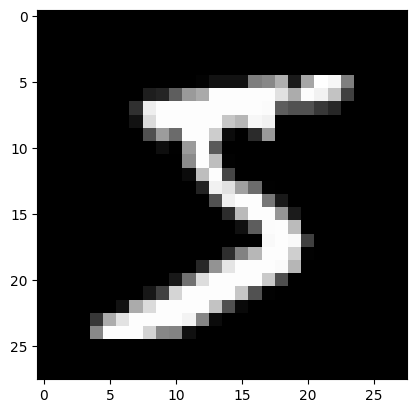

True label = 5


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

sample_number = 0
image = x_train[sample_number]
plt.imshow(image, cmap='gray')
plt.show()

print('True label =',np.argmax(y_train[sample_number]))

## Build the model

he model contains two convolutional layers, with two pooling layers in between them, then flatten layer, dropout layer, and finallu  a dense top that performs the actual classification.

Conv2D Layer:

    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"):
        This applies 32 convolutional filters, each of size 3×3, to the input image.
        The convolution operation detects features such as edges or patterns in the input.
        The activation function "ReLU" introduces non-linearity, helping the model learn complex patterns.
        The output of this layer is a feature map with 32 channels.

MaxPooling2D Layer:

    layers.MaxPooling2D(pool_size=(2, 2)):
        Applies a 2×2 pooling operation to the output of the Conv2D layer.
        Divides the feature map into 2×2 non-overlapping regions and keeps the maximum value from each region.
        Reduces the spatial dimensions (height and width) by half, while keeping the number of channels the same (32 channels from the first Conv2D layer).

![Maxpooling](https://img-blog.csdnimg.cn/20190618210011211.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L1RhcmRpZ3JhZGVf,size_16,color_FFFFFF,t_70 "Maxpooling")

Flatten layer:

    layers.Flatten()
        to convert the multi-dimensional feature maps outputted by the convolutional and pooling layers into a 1D vector.

Dropout:

    layers.Dropout(0.5):
        During training, this layer randomly sets 50% of its input units (as specified by 0.5) to 0 at each update step in order to prevent overfitting.

Dense:

    layers.Dense(num_classes, activation="softmax"):
        num_classes: Specifies the number of output neurons, equal to the number of target classes in the classification problem.
        activation="softmax": Applies the softmax activation function, which converts the outputs into probabilities for each class. The sum of these probabilities equals 1, making it suitable for multi-class classification.

Softmax:
    all outputs from 0 to 9 are between 0 and 1, and their sum is 1.

In [5]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),  # 5*5*24=1600
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7680 - loss: 0.7504 - val_accuracy: 0.9763 - val_loss: 0.0842
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9621 - loss: 0.1251 - val_accuracy: 0.9838 - val_loss: 0.0604
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9717 - loss: 0.0908 - val_accuracy: 0.9873 - val_loss: 0.0501
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9777 - loss: 0.0724 - val_accuracy: 0.9885 - val_loss: 0.0410
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9802 - loss: 0.0650 - val_accuracy: 0.9877 - val_loss: 0.0412
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9817 - loss: 0.0587 - val_accuracy: 0.9880 - val_loss: 0.0386
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9833 - loss: 0.0514 - val_accuracy: 0.9907 - val_loss: 0.0340
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9837 - loss: 0.0489 - val_acc

## Evaluate the trained model

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.024450840428471565
Test accuracy: 0.9914000034332275


In [8]:
history_dict = history.history

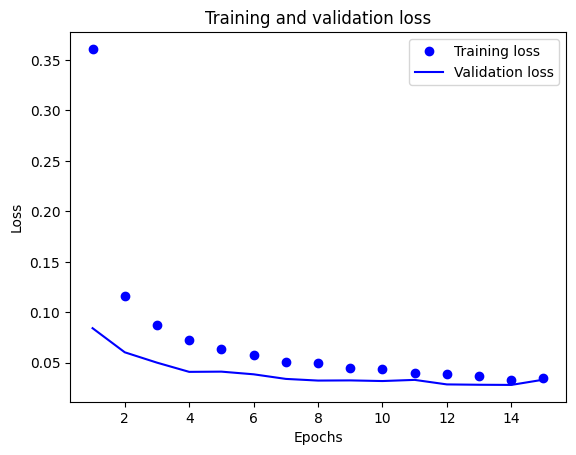

In [9]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

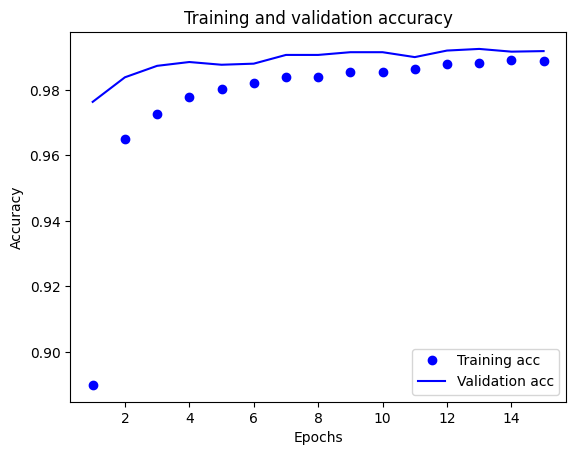

In [10]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
model.save("perusmalli.h5")

## predict and test one sample

Predictions for individual samples can be obtained with the `predict` method of the model. Predictions  and  labels for each sample are ten-element vectors; the actual prediction is the index with highest numerical value. This index can be found with the NumPy `argmax` function. 

In [11]:
predictions = model.predict(x_test)

sample_number = 5000
print(predictions[sample_number])
print('Prediction =',np.argmax(predictions[sample_number]))
print('True =',np.argmax(y_test[sample_number]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3.7943515e-14 7.7901739e-12 5.4739706e-07 9.9999380e-01 7.7328543e-12
 1.1931251e-06 4.4761326e-12 7.2024635e-09 4.4001899e-06 4.3373634e-09]
Prediction = 3
True = 3


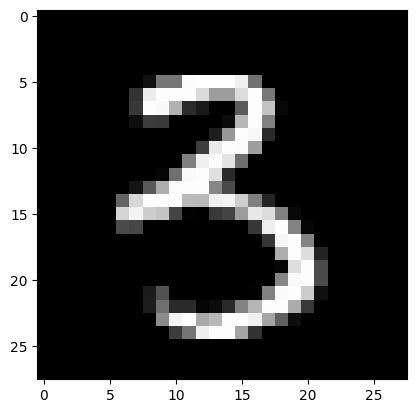

In [12]:
image = x_test[sample_number]
plt.imshow(image, cmap='gray')
plt.show()

## predicting own photo

In [47]:
from PIL import Image, ImageOps

# Lataa kuva
image_path = "kasi.jpg"
image = Image.open(image_path)

# Muunna harmaasävyksi
image_gray = image.convert("L")

# Käännä värit: teksti valkoiseksi ja tausta mustaksi
image_inverted = ImageOps.invert(image_gray)

# Muuta koko 28x28 pikseliksi
image_resized = image_inverted.resize((28, 28))

# Muunna NumPy-taulukoksi
image_array = np.array(image_resized)

# Skaalaa arvoja 0-255 välillä -> 0-1 (normalisointi)
image_array_normalized = image_array / 255.0

# Lisää kanavaulottuvuus (28x28 -> 28x28x1)
image_array_final = np.expand_dims(image_array_normalized, axis=-1)

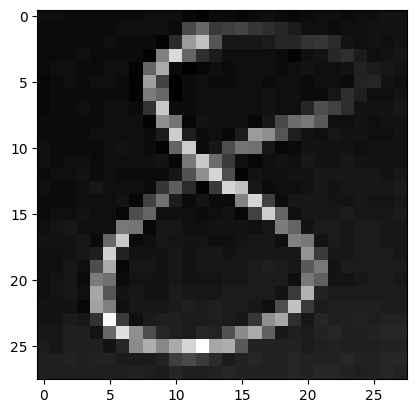

In [48]:
plt.imshow(image_array_final, cmap='gray')
plt.show()

In [49]:
image_array_final = np.expand_dims(image_array_final, axis=0) 
image_array_final.shape

(1, 28, 28, 1)

In [50]:
mypredict = model.predict(image_array_final)
predicted_class = np.argmax(mypredict, axis=1)
print("Predicted class:", predicted_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: 8


In [51]:
print(mypredict[0])

[0.10129666 0.09560261 0.09977238 0.0696742  0.08351876 0.13351767
 0.13010724 0.09880772 0.14659064 0.0411122 ]


In [66]:
from PIL import Image, ImageOps

# Lataa kuva
image_path = "yksi.jpg"
image = Image.open(image_path)

# Muunna harmaasävyksi
image_gray = image.convert("L")

# Käännä värit: teksti valkoiseksi ja tausta mustaksi
image_inverted = ImageOps.invert(image_gray)

# Muuta koko 28x28 pikseliksi
image_resized = image_inverted.resize((28, 28))

# Muunna NumPy-taulukoksi
image_array = np.array(image_resized)

# Skaalaa arvoja 0-255 välillä -> 0-1 (normalisointi)
image_array_normalized = image_array / 255.0

# Lisää kanavaulottuvuus (28x28 -> 28x28x1)
image_array_final_yks = np.expand_dims(image_array_normalized, axis=-1)

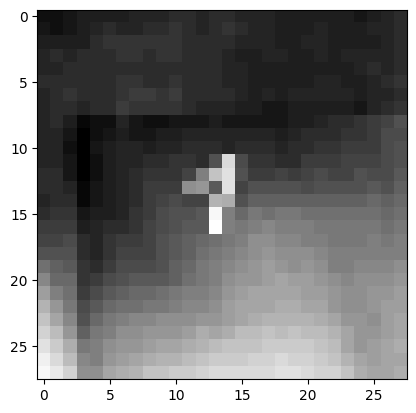

In [67]:
plt.imshow(image_array_final_yks, cmap='gray')
plt.show()

In [68]:
from tensorflow.keras.models import load_model
modelx = load_model("perusmalli.h5")  # Replace with your saved model's filename
modelx.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,828 (136.05 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [69]:
modelx.compile(
    optimizer='adam',  # Use the same optimizer you originally used
    loss='categorical_crossentropy',  # Replace with the original loss function
    metrics=['accuracy']  # Replace with the metrics you used
)

In [70]:
print(image_array_final_yks.shape)

(28, 28, 1)


In [73]:
# Add batch dimension
image_array_final_yks = np.expand_dims(image_array_final_yks, axis=0)

# Normalize the image data (optional, depends on training)
image_array_final_yks = image_array_final_yks.astype('float32') / 255.0

# Predict
mypredict2 = modelx.predict(image_array_final_yks)

# Print the predictions
print(mypredict2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.10454856 0.11606798 0.0976811  0.09485163 0.09152277 0.09424844
  0.09956533 0.10064951 0.10180408 0.09906062]]


In [74]:
predicted_class = np.argmax(mypredict2, axis=1)
print("Predicted class:", predicted_class[0])

Predicted class: 1
